In [1]:
import torch
import torchvision
from IPython import display
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image
import imageio
from dnn5 import *
from dnn6 import *

In [2]:
mnist_train = torchvision.datasets.MNIST(root='~/Datasets/MNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='~/Datasets/MNIST', train=False, download=True, transform=transforms.ToTensor())

In [3]:
print(type(mnist_train))
print(len(mnist_train), len(mnist_test))

<class 'torchvision.datasets.mnist.MNIST'>
60000 10000


In [4]:
feature, label = mnist_train[0]
print(feature.shape, label)  # Channel x Height x Width

torch.Size([1, 28, 28]) 5


In [5]:
def use_svg_display():
    """Use svg format to display plot in jupyter"""
    display.set_matplotlib_formats('svg')

In [6]:
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

In [7]:
def get_mnist_labels(labels):
    text_labels = ['0', '1', '2', '3', '4',
                   '5', '6', '7', '8', '9']
    return [text_labels[int(i)] for i in labels]

In [8]:
def show_mnist(images, labels):
    use_svg_display()
    # 这里的_表示我们忽略（不使用）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

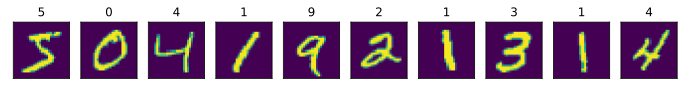

In [9]:
train_x_example, train_y_example = [], []
for i in range(10):
    train_x_example.append(mnist_train[i][0])
    train_y_example.append(mnist_train[i][1])
show_mnist(train_x_example, get_mnist_labels(train_y_example))

In [10]:
test_x_example, test_y_example = [], []
for i in range(10):
    test_x_example.append(mnist_test[i][0])
    test_y_example.append(mnist_test[i][1])

In [11]:
def get_numpy_datasets(datasets):
    X, y = [], []
    for i in range(len(datasets)):
        X.append(datasets[i][0].view((28, 28)).numpy())
        y.append(datasets[i][1])
    X = np.array(X)
    y = np.array(y)
    return X, y

In [12]:
train_x_orig,train_y_orig = get_numpy_datasets(mnist_train)
test_x_orig,test_y_orig = get_numpy_datasets(mnist_test)

In [13]:
print(train_x_orig.shape[0])

60000


In [14]:
# 改变训练集和验证集的形状
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T
train_y = train_y_orig.reshape(train_y_orig.shape[0],-1).T   # The "-1" makes reshape flatten the remaining dimensions
test_y = test_y_orig.reshape(test_y_orig.shape[0],-1).T

In [15]:
print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("train_y's shape: " + str(train_y.shape))
print ("test_y's shape: " + str(test_y.shape))

train_x's shape: (784, 60000)
test_x's shape: (784, 10000)
train_y's shape: (1, 60000)
test_y's shape: (1, 10000)


Cost after epoch 0: 0.500000
Cost after epoch 20: 0.135417
Cost after epoch 40: 0.218750
Cost after epoch 60: 0.125000


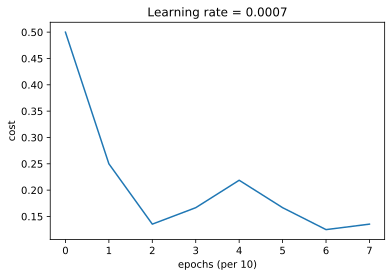

Accuracy: 0.8546


In [16]:
# 训练一个三层网络
layers_dims = [train_x.shape[0], 4, 3, 10]
# parameters = model(train_x, train_y, layers_dims, optimizer = "gd",mini_batch_size = 128,num_epochs = 100)
#parameters = model(train_x, train_y, layers_dims, optimizer = "momentum",mini_batch_size = 128,num_epochs = 300)
parameters = model(train_x, train_y, layers_dims, optimizer = "adam",mini_batch_size = 128,num_epochs = 80)

# 预测
predictions = predict(train_x, train_y, parameters)

In [17]:
predictions = predict(test_x, test_y, parameters)

Accuracy: 0.8477


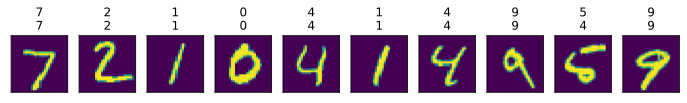

In [18]:
probas, _ = forward_propagation(test_x[:,0:10], parameters)
pred_labels = get_mnist_labels(list(np.argmax(probas,axis=0)))
titles = [true + '\n' + pred for true, pred in zip(get_mnist_labels(test_y_example), pred_labels)]
show_mnist(test_x_example, titles)